In [174]:
###Individual assignment
###Social Media Analytics for Business Intelligence
###Katharina Sabrina Bursy

In [5]:
# Facebook page analysis starter
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# What types of Posts?

In [6]:
# load facebook dataset: Australian cosmetics company page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_time    2044 non-null   object 
 1   message         2024 non-null   object 
 2   type            2044 non-null   object 
 3   story           119 non-null    object 
 4   likes_count     2044 non-null   int64  
 5   comments_count  2044 non-null   int64  
 6   shares_count    2044 non-null   int64  
 7   love_count      2042 non-null   float64
 8   haha_count      2042 non-null   float64
 9   wow_count       2042 non-null   float64
 10  sad_count       2042 non-null   float64
 11  angry_count     2042 non-null   float64
 12  comments        1562 non-null   object 
 13  message_clean   2044 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 223.7+ KB


In [7]:
df["type"].value_counts()  

photo     1967
video       42
link        20
status      15
Name: type, dtype: int64

# Which posts are commented the most?

In [8]:
df2=df["type"]
df2

0       photo
1       photo
2       photo
3       photo
4       photo
        ...  
2039    photo
2040    photo
2041    photo
2042    photo
2043    photo
Name: type, Length: 2044, dtype: object

In [9]:
df2=df[["type","comments_count"]]
df2

,type,comments_count
0,photo,47
1,photo,8
2,photo,12
3,photo,0
4,photo,0
...,...,...
2039,photo,70
2040,photo,1
2041,photo,4
2042,photo,2


In [10]:
#Display average comments per type in the dataset
for lk in df["type"].unique():
    nl = df[df["type"] == lk ]["comments_count"].mean()
    print(f"Type {lk} has {nl} on average comments in the dataset")

Type photo has 17.026436197254704 on average comments in the dataset
Type video has 1.619047619047619 on average comments in the dataset
Type link has 1.3 on average comments in the dataset
Type status has 2.0 on average comments in the dataset


In [11]:
#create a variable for the above information
Commentnumbers=[17.02, 1.61, 1.3, 2.0]

# Which posts are shared the most?

In [12]:
df3=df["type"]
df3

0       photo
1       photo
2       photo
3       photo
4       photo
        ...  
2039    photo
2040    photo
2041    photo
2042    photo
2043    photo
Name: type, Length: 2044, dtype: object

In [13]:
df3=df[["type","shares_count"]]
df3

,type,shares_count
0,photo,46
1,photo,80
2,photo,2
3,photo,0
4,photo,6
...,...,...
2039,photo,4
2040,photo,0
2041,photo,1
2042,photo,1


In [14]:
#Display average shares per type in the dataset
for lk in df["type"].unique():
    nl = df[df["type"] == lk ]["shares_count"].mean()
    print(f"Type {lk} has {nl} on average shares in the dataset")

Type photo has 3.887646161667514 on average shares in the dataset
Type video has 0.8571428571428571 on average shares in the dataset
Type link has 0.4 on average shares in the dataset
Type status has 0.26666666666666666 on average shares in the dataset


In [15]:
#create variabe for the above
sharednumber=[3.88, 0.85, 0.4, 0.26]

#  What text to post?

In [16]:
# keywords occurring throughout all of the posts: clean up the text first
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [17]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['message_clean'] = df['message'].apply(text_cleanup)
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder ed...


In [18]:
# combine all post text entries
text_all = ' '.join(df['message_clean'])

# Wordcloud per type

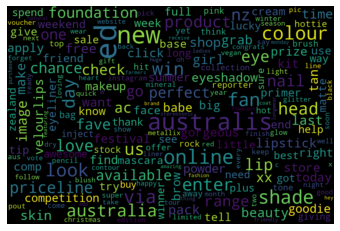

In [19]:
# keywords occurring throughout all of the posts
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_all)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [20]:
kwords=WordCloud().process_text(text_all)
df_kwords=pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords


,count
keyword,
ummm,1
yum,2
ultimate,6
naughty,3
treat,20
...,...
ac product,15
blend friend,5
blending tool,2


In [21]:
df_kwords.sort_values(by='count', ascending=False).head(10)

,count
keyword,
ed ed,463
new,253
look,236
shade,169
love,169
priceline australia,148
one,140
check,135
fave,127


## Wordcloud status

In [22]:
dfs=df[df["type"] == "status"]
dfs

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
348,2013-02-01 16:46:43,"Tell us, which new Glitter Nail Colour is your...",status,Australis Cosmetics created a poll.,8,0,0,0.0,0.0,0.0,0.0,0.0,NaN,tell us new glitter nail colour fave milky way...
667,2013-08-08 17:24:27,New Zealand lovelies! New NZ-exclusive competi...,status,NaN,58,1,1,0.0,0.0,0.0,0.0,0.0,"Hey there, gorgeous NZ fans! The competition i...",new zealand lovelies new competition tomorrow ...
781,2013-10-16 15:52:45,Want change from $10 to buy a cheeky choccie? ...,status,NaN,85,6,0,0.0,0.0,0.0,0.0,0.0,Aww wish this was Kmart NZ too! Hey Heather De...,want change 10 buy cheeky choccie yeah foundat...
785,2013-10-17 12:40:01,Thank you for entering our ice cream competiti...,status,NaN,17,2,0,0.0,0.0,0.0,0.0,0.0,ooh how exciting :) Good luck girls!! :),thank entering ice cream competition bellas an...
800,2013-10-28 12:18:33,Thanks so much to all our beautiful NZ fans wh...,status,NaN,42,5,0,0.0,0.0,0.0,0.0,0.0,Exciting!! Cool would love to win for my mum :...,thanks much beautiful nz fans entered nail col...
805,2013-10-30 16:00:01,LAST SALE DAY! Last day to score $5 off Austra...,status,NaN,4,1,0,0.0,0.0,0.0,0.0,0.0,today or tomorrow?,last sale day last day score 5 australis found...
810,2013-11-01 18:04:59,"NZ girls, you NEED to get to Farmers, like now...",status,NaN,63,3,1,0.0,0.0,0.0,0.0,0.0,arrghh Im broke!! I got the naked 2.0 or nude ...,nz girls need get farmers like get 3 2 selecte...
825,2013-11-08 08:33:59,"Hey gorgeous ladies, we're currently experienc...",status,NaN,19,0,0,0.0,0.0,0.0,0.0,0.0,NaN,hey gorgeous ladies currently experiencing iss...
830,2013-11-11 17:56:02,"Time for a beauty haul, NZ fans. Get to Farmer...",status,NaN,41,6,1,0.0,0.0,0.0,0.0,0.0,Nicole Buchanan yeyahhhh Yesssss!!!! Farmers i...,time beauty haul nz fans get farmers today dec...
833,2013-11-13 14:17:30,"It's World Kindness Day today, babes, so why n...",status,NaN,39,1,1,0.0,0.0,0.0,0.0,0.0,I'm always kind :),world kindness day today babes take time somet...


In [23]:
textstatus=  ' '.join(dfs['message_clean'])

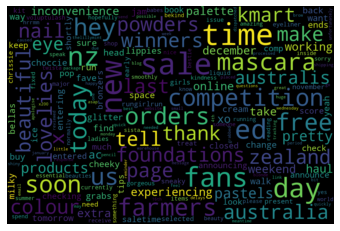

In [24]:
# keywords occurring throughout status
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(textstatus)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [179]:
swords=WordCloud().process_text(textstatus)
df_swords=pd.DataFrame(list(swords.items()), columns=['keyword', 'count']).set_index('keyword')
df_swords
df_swords.sort_values(by='count', ascending=False).head(10)

,count
keyword,
sale,5
new,5
time,5
day,4
ed,4
nz,4
fans,4
us,3
mascara,3


# Wordcloud Photo


In [26]:
dfp=df[df["type"] == "photo"]
dfp

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder ed...


In [27]:
textphoto=  ' '.join(dfp['message_clean'])

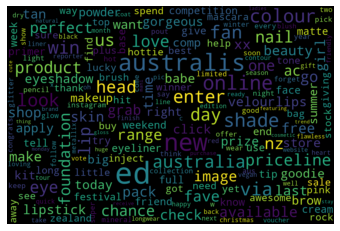

In [28]:
# keywords occurring througout photos
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(textphoto)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [29]:
pwords=WordCloud().process_text(textphoto)
df_pwords=pd.DataFrame(list(pwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_pwords
df_pwords.sort_values(by='count', ascending=False).head(10)

,count
keyword,
ed ed,438
new,256
look,229
shade,164
love,151
priceline australia,144
one,136
fave,122
check,115


## Wordcloud Video


In [30]:
dfv=df[df["type"] == "video"]
dfv

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
37,2012-07-17 10:21:37,We love Jennifer Aniston! We're giving away 10...,video,NaN,8,6,0,0.0,0.0,0.0,0.0,0.0,LOVE Paul Rudd! He's such a cutie. she's so ho...,love jennifer aniston giving away 10 copies la...
60,2012-08-02 10:57:15,We�re so excited! Make way for some new beauty...,video,NaN,13,0,4,0.0,0.0,0.0,0.0,0.0,NaN,excited make way new beauty girls launch austr...
70,2012-08-09 11:41:47,Gotye's new vid is out! Do you love it as much...,video,NaN,8,1,0,0.0,0.0,0.0,0.0,0.0,I've been waiting for a video to this song!,gotye new vid love much used know
81,2012-08-16 10:50:03,HOMEBAKE!!! Tickets went on sale this morning....,video,NaN,11,1,0,0.0,0.0,0.0,0.0,0.0,Why don't I ever see these events advertised? ...,homebake tickets went sale morning anyone scor...
89,2012-08-22 14:39:07,Proof that Beyonc� is the most amazing woman e...,video,NaN,32,3,1,0.0,0.0,0.0,0.0,0.0,Most beautiful woman inside and out <3 Amazing...,proof beyonc amazing woman ever xx
139,2012-09-26 09:51:54,The Laneway Fest line-up has just been announc...,video,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,laneway fest announced totally heart rubens sn...
211,2012-11-08 16:11:39,Can't wait for Major Lazer to rock out at Ster...,video,NaN,2,0,0,0.0,0.0,0.0,0.0,0.0,NaN,ca wait major lazer rock stereosonic want win ...
221,2012-11-13 15:14:39,Thanks to Shaaanxo for listing our 10Hr Wear E...,video,NaN,10,1,0,0.0,0.0,0.0,0.0,0.0,NaN,thanks shaaanxo listing 10hr wear eye pencil o...
233,2012-11-21 10:27:59,Our WA Festival Reporter Elodie is such a hott...,video,NaN,5,0,1,0.0,0.0,0.0,0.0,0.0,NaN,wa festival reporter elodie hottie check vid c...
237,2012-11-23 12:00:01,Do blondes do it better? Check out what Renae ...,video,NaN,10,0,0,0.0,0.0,0.0,0.0,0.0,NaN,blondes better check renae nsw say one 5 festi...


In [31]:
textvideo=  ' '.join(dfv['message_clean'])

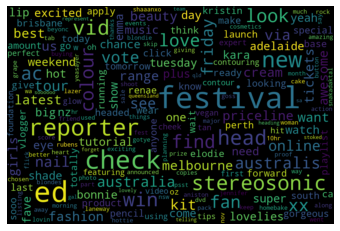

In [32]:
# keywords occurring throughout videos
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(textvideo)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [181]:
vwords=WordCloud().process_text(textvideo)
df_vwords=pd.DataFrame(list(vwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_vwords

,count
keyword,
love,7
jennifer,1
aniston,1
giving,1
away,1
...,...
fashion music,3
ac tour,5
ed ed,12


In [182]:
df_vwords.sort_values(by='count', ascending=False).head(10)

,count
keyword,
check,16
festival reporter,12
ed ed,12
new,12
vid,10
stereosonic,10
head,10
find,8
look,8


## Wordcloud Link

In [34]:
dfl=df[df["type"] == "link"]
dfl

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
53,2012-07-27 11:14:21,We're jealous of all the babes out there who g...,link,NaN,11,0,1,0.0,0.0,0.0,0.0,0.0,NaN,jealous babes get fun play splendour rest us
244,2012-11-28 11:27:02,Check out our new information tab here for the...,link,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,NaN,check new information tab latest australis vid...
546,2013-05-24 13:24:59,NaN,link,Australis Cosmetics likes RMK Shoes.,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,
608,2013-07-03 11:36:28,NaN,link,Australis Cosmetics likes M�venpick Ice Cream.,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,
840,2013-11-14 10:47:13,NaN,link,Australis Cosmetics likes Lorde.,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,
868,2013-11-28 14:21:47,NaN,link,Australis Cosmetics likes Never Be Beige.,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,
1355,2014-09-01 19:30:01,Spring is officially here. Oh how we have miss...,link,NaN,10,0,0,0.0,0.0,0.0,0.0,0.0,NaN,spring officially oh missed sunshine time babi...
1593,2015-06-29 12:22:17,You asked for it and now international shippin...,link,NaN,431,0,0,0.0,0.0,0.0,0.0,0.0,NaN,asked international shipping available website...
1719,2015-12-04 12:08:21,Have you seen the new website?! \nClick throug...,link,NaN,14,0,0,0.0,0.0,0.0,0.0,0.0,NaN,seen new website click new layout plus new fea...
1769,2016-02-04 16:35:00,Want some tips & tricks on contour for your fa...,link,NaN,11,1,0,0.0,0.0,0.0,0.0,0.0,The cream in light is disgusting its way too w...,want tips tricks contour face shape wondering ...


In [185]:
textlink=  ' '.join(dfl['message_clean'])

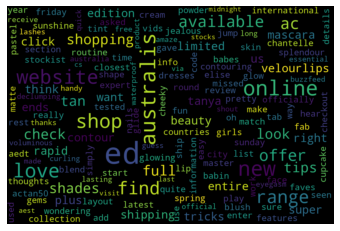

In [186]:
# keywords occurring throughout videos
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(textlink)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [189]:
lwords=WordCloud().process_text(textlink)
df_lwords=pd.DataFrame(list(lwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_lwords
df_lwords.sort_values(by='count', ascending=False).head(10)

,count
keyword,
ed ed,11
new,7
online,7
australis,7
love,6
website,6
shop,6
range,5
find,5


# When and when not to post?

In [38]:
# top-most commented entries
dfwhen= df.sort_values(by='comments_count', ascending=False).head(20)
dfwhen

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...
1419,2014-12-03 19:30:01,"Christmas is about giving, so we�re giving you...",photo,NaN,495,679,56,0.0,0.0,0.0,0.0,0.0,So she can do her own brows and add some colou...,christmas giving giving chance win 2 australis...
1972,2016-10-16 17:00:00,Oh yes! Here's the game changer....our NEW Mat...,photo,NaN,1214,627,42,87.0,1.0,48.0,0.0,0.0,Kayleigh Christ Josie Ponsonby Doan Hoang Niki...,oh yes game changer new match maker shade adju...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
1315,2014-08-11 18:35:00,To celebrate the release of our 2 awesome new ...,photo,Australis Cosmetics with Tracy Martens and 7 o...,723,603,60,0.0,0.0,0.0,0.0,0.0,Mash up is my fav because it has just the righ...,celebrate release 2 awesome new colour inject ...
1196,2014-06-10 16:45:01,The weather is getting cold but that doesn't m...,photo,NaN,708,587,60,0.0,0.0,0.0,0.0,0.0,I use a thicker lip balm and switch out my lip...,weather getting cold mean ca look hot giving c...
1502,2015-03-12 18:00:01,Are you lovin� Velourlips? Here's your chance ...,photo,NaN,462,583,40,0.0,0.0,0.0,0.0,0.0,everywhere To work of course! when dropping th...,lovin velourlips chance win five new shades ma...
1394,2014-10-27 20:00:00,It�s your last chance to snag some Popbasic sw...,photo,NaN,188,538,14,0.0,0.0,0.0,0.0,0.0,26 products :) 24 28 23 <U+2661> 21 30 :) xxx ...,last chance snag popbasic swag chance win sold...
1984,2016-10-30 16:45:00,Time to turn all those foundations that are 'n...,photo,NaN,849,521,36,45.0,0.0,27.0,0.0,0.0,Amanda Mel Stralow Elizabeth Paulino Gina prob...,time turn foundations right right ed ed drops ...
1365,2014-09-19 16:30:01,"Oh hai, Oh Hai Brow Kit! To celebrate this upc...",photo,NaN,482,504,180,0.0,0.0,0.0,0.0,0.0,Yes please Love Australis Cosmetics and I coul...,oh hai oh hai brow kit celebrate upcoming laun...


In [39]:
dfwhen['created_time']=pd.to_datetime(dfwhen['created_time'])

In [40]:
dfwhen['created_time'].dt.hour

1367    19
1419    19
1972    17
1764    13
1315    18
1196    16
1502    18
1394    20
1984    16
1365    16
958     14
1370    19
1715    17
1900    18
1423    18
1203    16
1385    21
1893    20
1822    17
1883    18
Name: created_time, dtype: int64

In [41]:
# store hour into object
dfwhen_hour = dfwhen['created_time'].dt.hour

# create a list of our conditions
conditions = [
    (dfwhen_hour <= 12),
    (dfwhen_hour == 12),
    (dfwhen_hour > 12) & (dfwhen_hour <= 18),
    (dfwhen_hour > 18)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'noon', 'afternoon', 'evening']

# import numpy as np
import numpy as np

# create a new column and use np.select to assign values to it using our lists as arguments
dfwhen['time_of_day'] = np.select(conditions, values)

# display updated DataFrame
dfwhen.head()

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean,time_of_day
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...,evening
1419,2014-12-03 19:30:01,"Christmas is about giving, so we�re giving you...",photo,NaN,495,679,56,0.0,0.0,0.0,0.0,0.0,So she can do her own brows and add some colou...,christmas giving giving chance win 2 australis...,evening
1972,2016-10-16 17:00:00,Oh yes! Here's the game changer....our NEW Mat...,photo,NaN,1214,627,42,87.0,1.0,48.0,0.0,0.0,Kayleigh Christ Josie Ponsonby Doan Hoang Niki...,oh yes game changer new match maker shade adju...,afternoon
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed,afternoon
1315,2014-08-11 18:35:00,To celebrate the release of our 2 awesome new ...,photo,Australis Cosmetics with Tracy Martens and 7 o...,723,603,60,0.0,0.0,0.0,0.0,0.0,Mash up is my fav because it has just the righ...,celebrate release 2 awesome new colour inject ...,afternoon


In [42]:
#Top commented times
dfwhen['time_of_day'].value_counts()

afternoon    14
evening       6
Name: time_of_day, dtype: int64

In [43]:
# least-most commented entries
dfwhenn= df.sort_values(by='comments_count', ascending=True).head(20)
dfwhenn

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
2043,2017-01-16 20:00:00,LAST CHANCE! Our Double Ended Contouring and B...,photo,NaN,4,0,0,0.0,0.0,0.0,0.0,0.0,NaN,last chance double ended contouring blending t...
381,2013-02-19 10:32:42,Click LIKE if you know what we mean ;) Head he...,photo,NaN,47,0,1,0.0,0.0,0.0,0.0,0.0,NaN,click like know mean head find foundations 20
1077,2014-04-11 11:20:01,Are any of our NZ fans excited to have some 'f...,photo,NaN,22,0,0,0.0,0.0,0.0,0.0,0.0,NaN,nz fans excited weekend
1083,2014-04-15 10:05:00,We're loving this review of our products by Ni...,photo,NaN,33,0,0,0.0,0.0,0.0,0.0,0.0,NaN,loving review products nicole beauty spot chec...
376,2013-02-15 11:35:34,"We <3 Novo Shoes, and they love us back ;) Hea...",photo,NaN,20,0,0,0.0,0.0,0.0,0.0,0.0,NaN,3 novo shoes love us back head website enter c...
375,2013-02-15 10:47:28,Congrats to these hotties who won our Jan A-Li...,photo,NaN,9,0,0,0.0,0.0,0.0,0.0,0.0,NaN,congrats hotties jan events comp louise milazz...
1088,2014-04-17 10:17:48,"The bikini or the ice cream, which would you c...",photo,NaN,24,0,0,0.0,0.0,0.0,0.0,0.0,NaN,bikini ice cream would choose hint answer alwa...
372,2013-02-14 14:06:23,"Happy Valentine's Day, girls! Hope you all hav...",photo,Australis Cosmetics with Engemar Tamaray Meman...,87,0,4,0.0,0.0,0.0,0.0,0.0,NaN,happy valentine day girls hope glitter day hea...
371,2013-02-14 06:00:00,Girls! Last few hours to make a cupcake and en...,photo,NaN,9,0,0,0.0,0.0,0.0,0.0,0.0,NaN,girls last hours make cupcake enter comp win h...
368,2013-02-13 11:19:46,Only ONE day 'til the big day... Valentine's D...,photo,NaN,5,0,0,0.0,0.0,0.0,0.0,0.0,NaN,one day big day valentine day make sure enter ...


In [44]:
dfwhenn['created_time']=pd.to_datetime(dfwhenn['created_time'])
dfwhenn['created_time'].dt.hour

2043    20
381     10
1077    11
1083    10
376     11
375     10
1088    10
372     14
371      6
368     11
1098    17
366     12
365     17
1104    12
1107    10
1108    13
1112    10
1117    16
1119    18
1127    10
Name: created_time, dtype: int64

In [190]:
# store hour into object
dfwhenn_hour = dfwhenn['created_time'].dt.hour

# create a list of our conditions
conditions = [
    (dfwhenn_hour <= 12),
    (dfwhenn_hour == 12),
    (dfwhenn_hour > 12) & (dfwhenn_hour <= 18),
    (dfwhenn_hour > 18)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'noon', 'afternoon', 'evening']

# import numpy as np
#import numpy as np

# create a new column and use np.select to assign values to it using our lists as arguments
dfwhenn['time_of_day'] = np.select(conditions, values)

# display updated DataFrame
dfwhenn.head()

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean,time_of_day
2043,2017-01-16 20:00:00,LAST CHANCE! Our Double Ended Contouring and B...,photo,NaN,4,0,0,0.0,0.0,0.0,0.0,0.0,NaN,last chance double ended contouring blending t...,evening
381,2013-02-19 10:32:42,Click LIKE if you know what we mean ;) Head he...,photo,NaN,47,0,1,0.0,0.0,0.0,0.0,0.0,NaN,click like know mean head find foundations 20,morning
1077,2014-04-11 11:20:01,Are any of our NZ fans excited to have some 'f...,photo,NaN,22,0,0,0.0,0.0,0.0,0.0,0.0,NaN,nz fans excited weekend,morning
1083,2014-04-15 10:05:00,We're loving this review of our products by Ni...,photo,NaN,33,0,0,0.0,0.0,0.0,0.0,0.0,NaN,loving review products nicole beauty spot chec...,morning
376,2013-02-15 11:35:34,"We <3 Novo Shoes, and they love us back ;) Hea...",photo,NaN,20,0,0,0.0,0.0,0.0,0.0,0.0,NaN,3 novo shoes love us back head website enter c...,morning


In [46]:
#least commented
dfwhenn['time_of_day'].value_counts()

morning      13
afternoon     6
evening       1
Name: time_of_day, dtype: int64

In [191]:
# top-most shared entries
dfwhens= df.sort_values(by='shares_count', ascending=False).head(20)
dfwhens
dfwhens['created_time']=pd.to_datetime(dfwhens['created_time'])
dfwhens['created_time'].dt.hour
# store hour into object
dfwhens_hour = dfwhens['created_time'].dt.hour

# create a list of our conditions
conditions = [
    (dfwhens_hour <= 12),
    (dfwhens_hour == 12),
    (dfwhens_hour > 12) & (dfwhens_hour <= 18),
    (dfwhens_hour > 18)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'noon', 'afternoon', 'evening']

# import numpy as np
#import numpy as np

# create a new column and use np.select to assign values to it using our lists as arguments
dfwhens['time_of_day'] = np.select(conditions, values)

# display updated DataFrame, most shared
dfwhens.head()
dfwhens['time_of_day'].value_counts()

afternoon    13
morning       5
evening       2
Name: time_of_day, dtype: int64

In [192]:
# least-most shared entries
dfwhenns= df.sort_values(by='shares_count', ascending=True).head(20)
dfwhenns
dfwhenns['created_time']=pd.to_datetime(dfwhenns['created_time'])
dfwhenns['created_time'].dt.hour
# store hour into object
dfwhenns_hour = dfwhenns['created_time'].dt.hour

# create a list of our conditions
conditions = [
    (dfwhenns_hour <= 12),
    (dfwhenns_hour == 12),
    (dfwhenns_hour > 12) & (dfwhenns_hour <= 18),
    (dfwhenns_hour > 18)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'noon', 'afternoon', 'evening']

# import numpy as np
#import numpy as np

# create a new column and use np.select to assign values to it using our lists as arguments
dfwhenns['time_of_day'] = np.select(conditions, values)

# display updated DataFrame, least shared
dfwhenns.head()
dfwhenns['time_of_day'].value_counts()

morning      13
afternoon     6
evening       1
Name: time_of_day, dtype: int64

# Sentiment analysis of posts



In [49]:
text = df['message_clean'][0]
text

'ummm yum would ultimate naughty treat'

In [50]:
stopwords

<WordListCorpusReader in '/Users/katharinabursy/nltk_data/corpora/stopwords'>

In [51]:
stop_words= set (stopwords.words("english"))
print(stop_words)

{'which', 'be', 'other', 'so', 'shouldn', 'more', 'being', 'them', 'on', 'wasn', 'themselves', 'all', 'won', 'you', 'because', 'do', "hasn't", 'couldn', 'haven', 'against', 'same', "shan't", 'up', 'mightn', 'for', 'under', 'the', 'didn', 'what', 'above', 'an', 'to', "didn't", 'after', 'hers', 'than', 'between', 'ourselves', 'myself', 'he', "haven't", 'only', 'himself', 'we', 'is', 'both', 'own', 'your', 'at', 'yours', 'did', 'i', 'then', 'if', 'some', 'any', "aren't", 'needn', 'ours', 'it', 'below', 'him', 'and', 'those', 'nor', 'wouldn', 'their', 'does', 'm', 'my', "mightn't", "isn't", 'will', 'having', "you'll", 'his', 'when', 'while', 'further', 'very', 'll', 'but', "don't", 'not', 'in', 'has', 'her', "doesn't", "you'd", 'herself', 'over', 'had', "you've", 'off', 'ma', 'too', 'hasn', 'or', "wasn't", 'how', 'its', 'am', 'during', 'yourself', 'who', 'itself', 'each', 'down', 'doesn', 'ain', 'out', 'there', 've', "needn't", 'they', "couldn't", 'can', "hadn't", 'theirs', 'she', 'o', 'we

In [52]:
#removing emojis
# analyze text content, not encoded emoji etc.
semoji = 'This is a smiley face \U0001f602'
semoji
# remove non-ASCII characters to leave only the text
# CAUTION: if needeng to analyze multilingual text, modify this as in the answer below for example
# https://stackoverflow.com/questions/51784964/remove-emojis-from-multilingual-unicode-text/51785357#51785357
semoji.encode('ascii', 'ignore').decode('ascii')

'This is a smiley face '

In [53]:
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

In [54]:
text_clean_init = text_cleanup_init(text)
text_clean_init

'ummm yum would ultimate naughty treat'

In [55]:
#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

['ummm', 'yum', 'would', 'ultimate', 'naughty', 'treat']

In [56]:
# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [57]:
text_cleanup (text, stop_words)

'ummm yum would ultimate naughty treat'

In [58]:
text_clean = text_cleanup(text, stop_words)
print(text_clean)

ummm yum would ultimate naughty treat


In [59]:
from textblob import TextBlob

In [60]:
# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

In [61]:
## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

Sentiment(polarity=-0.07500000000000001, subjectivity=0.95)


## Sentiment Top commented 

In [62]:
# top-most commented entries
dftc= df.sort_values(by='comments_count', ascending=False).head(10)
dftc

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...
1419,2014-12-03 19:30:01,"Christmas is about giving, so we�re giving you...",photo,NaN,495,679,56,0.0,0.0,0.0,0.0,0.0,So she can do her own brows and add some colou...,christmas giving giving chance win 2 australis...
1972,2016-10-16 17:00:00,Oh yes! Here's the game changer....our NEW Mat...,photo,NaN,1214,627,42,87.0,1.0,48.0,0.0,0.0,Kayleigh Christ Josie Ponsonby Doan Hoang Niki...,oh yes game changer new match maker shade adju...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
1315,2014-08-11 18:35:00,To celebrate the release of our 2 awesome new ...,photo,Australis Cosmetics with Tracy Martens and 7 o...,723,603,60,0.0,0.0,0.0,0.0,0.0,Mash up is my fav because it has just the righ...,celebrate release 2 awesome new colour inject ...
1196,2014-06-10 16:45:01,The weather is getting cold but that doesn't m...,photo,NaN,708,587,60,0.0,0.0,0.0,0.0,0.0,I use a thicker lip balm and switch out my lip...,weather getting cold mean ca look hot giving c...
1502,2015-03-12 18:00:01,Are you lovin� Velourlips? Here's your chance ...,photo,NaN,462,583,40,0.0,0.0,0.0,0.0,0.0,everywhere To work of course! when dropping th...,lovin velourlips chance win five new shades ma...
1394,2014-10-27 20:00:00,It�s your last chance to snag some Popbasic sw...,photo,NaN,188,538,14,0.0,0.0,0.0,0.0,0.0,26 products :) 24 28 23 <U+2661> 21 30 :) xxx ...,last chance snag popbasic swag chance win sold...
1984,2016-10-30 16:45:00,Time to turn all those foundations that are 'n...,photo,NaN,849,521,36,45.0,0.0,27.0,0.0,0.0,Amanda Mel Stralow Elizabeth Paulino Gina prob...,time turn foundations right right ed ed drops ...
1365,2014-09-19 16:30:01,"Oh hai, Oh Hai Brow Kit! To celebrate this upc...",photo,NaN,482,504,180,0.0,0.0,0.0,0.0,0.0,Yes please Love Australis Cosmetics and I coul...,oh hai oh hai brow kit celebrate upcoming laun...


In [63]:
text = dftc['message_clean'][1367]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

get ready oh hai brow coming want try anyone else tag friend youd like say oh hai chance win ultimate eyes pack valued including unreleased oh hai brow shaping kit
Sentiment(polarity=0.3333333333333333, subjectivity=0.6333333333333333)


In [64]:
text = dftc['message_clean'][1419]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

christmas giving giving chance win 2 australis prize packs thats one one friend win tell us one friends deserves australis essentials pack christmas tree cs see
Sentiment(polarity=0.8, subjectivity=0.4)


In [65]:
text = dftc['message_clean'][1972]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

oh yes game changer new match maker shade adjusting drops ed ed ed ed beauties come lightening darkening shades know foundation always match shop online ed ed ed ed
Sentiment(polarity=-0.13181818181818183, subjectivity=0.42727272727272725)


In [66]:
text = dftc['message_clean'][1764]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

guess ed ed ed ed ed ed
Sentiment(polarity=0.0, subjectivity=0.0)


In [67]:
text = dftc['message_clean'][1315]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

celebrate release 2 awesome new colour inject lipstick shades giving chance win 1 3 full sets new packaging simply follow instructions image enter tag babein friend loves lippy aus res ends full cs
Sentiment(polarity=0.39610389610389607, subjectivity=0.5380333951762523)


In [68]:
text = dftc['message_clean'][1196]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

weather getting cold mean ca look hot giving chance win 1 5 awesome makeup makeover packs featuring new full foundation simply like image comment telling us change beauty routine winter enter forget share love friends good luck babes ends full cs
Sentiment(polarity=0.2885330578512397, subjectivity=0.6408353010625737)


In [69]:
text = dftc['message_clean'][1502]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

lovin velourlips chance win five new shades matte stick helps keep lip look lasting longer enter tell us rocking new shades cs apply
Sentiment(polarity=0.2681818181818182, subjectivity=0.32727272727272727)


In [70]:
text = dftc['message_clean'][1394]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

last chance snag popbasic swag chance win sold alice box containing three amaze pieces build fab wardrobe guess many australis products jar
Sentiment(polarity=0.43333333333333335, subjectivity=0.32222222222222224)


In [71]:
text = dftc['message_clean'][1984]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

time turn foundations right right ed ed drops loving ed ed angelabeautyxo shop online
Sentiment(polarity=0.3904761904761904, subjectivity=0.6738095238095237)


In [72]:
text = dftc['message_clean'][1365]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

oh hai oh hai brow kit celebrate upcoming launch giving away ultimate eyes pack feat exclusive first dibs brand new oh hai brow shaping kit tag friends tell us youd share win 5 packs grabs get sharing
Sentiment(polarity=0.2965909090909091, subjectivity=0.546969696969697)


In [73]:
sense= [[0.333, 0.633], [0.8, 0.4], [-0.131, 0.427], [0,0], [0.396, 0.538], [0.288, 0.640], [0.268, 0.327], [0.433, 0.322], [0.394, 0.673], [0.296, 0.546]]

In [74]:
dfcomm = pd.DataFrame(sense, columns = ['Polarity', 'Subjectivity'])
dfcomm

,Polarity,Subjectivity
0,0.333,0.633
1,0.800,0.400
2,-0.131,0.427
3,0.000,0.000
4,0.396,0.538
5,0.288,0.640
6,0.268,0.327
7,0.433,0.322
8,0.394,0.673
9,0.296,0.546


In [75]:
dfcomm['Polarity'].mean()

0.3077

In [76]:
dfcomm['Subjectivity'].mean()

0.4506

## Sentiment most shared posts 

In [77]:
# top-most shared entries
dfts= df.sort_values(by='shares_count', ascending=False).head(10)
dfts


,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1365,2014-09-19 16:30:01,"Oh hai, Oh Hai Brow Kit! To celebrate this upc...",photo,NaN,482,504,180,0.0,0.0,0.0,0.0,0.0,Yes please Love Australis Cosmetics and I coul...,oh hai oh hai brow kit celebrate upcoming laun...
218,2012-11-12 16:09:18,Who's with us?! Hit LIKE if you agree! xx,photo,Australis Cosmetics with Bhaona Gosai and 7 ot...,3601,35,166,0.0,0.0,0.0,0.0,0.0,<3 it Except for those girls that like other g...,us hit like agree xx
209,2012-11-08 09:40:34,'Share' this if you KNOW you're on your way to...,photo,NaN,2462,10,155,0.0,0.0,0.0,0.0,0.0,me to france. 4 me. an japan. an all ova europ...,know way somewhere awesome life
130,2012-09-19 11:23:15,Apparently Ryan Gosling is coming to Australia...,photo,NaN,2496,33,143,0.0,0.0,0.0,0.0,0.0,Poor Stacey would be devastated to learn that ...,apparently ryan gosling coming australia click...
36,2012-07-16 17:15:59,"Is it just us, or did today seem SUPER long? C...",photo,Australis Cosmetics with Danielle Mcdonald and...,2329,76,116,0.0,0.0,0.0,0.0,0.0,awesome . yyyaammiiiii YUMMYyyyyyyyyyyyyyyyyyy...,us today seem super long click also think real...
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...
39,2012-07-18 10:40:06,We <3 Audrey!,photo,NaN,478,5,87,0.0,0.0,0.0,0.0,0.0,im possible as i exist this has always been my...,3 audrey
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
540,2013-05-22 17:47:41,Too right! ;) Something to think about when yo...,photo,NaN,1011,12,78,0.0,0.0,0.0,0.0,0.0,Me and Anisha last night at 1 am hahahah Cherr...,right something think make little trip kitchen...
1715,2015-11-30 17:37:01,"Christmas is all about sharing, so we�re givin...",photo,NaN,371,425,73,0.0,0.0,0.0,0.0,0.0,Ashleigh Overton cuz ya awesome thats what! Pl...,christmas sharing giving 3 fans chance win x2 ...


In [78]:
text = dfts['message_clean'][1365]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

oh hai oh hai brow kit celebrate upcoming launch giving away ultimate eyes pack feat exclusive first dibs brand new oh hai brow shaping kit tag friends tell us youd share win 5 packs grabs get sharing
Sentiment(polarity=0.2965909090909091, subjectivity=0.546969696969697)


In [79]:
text = dfts['message_clean'][218]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

us hit like agree xx
Sentiment(polarity=0.0, subjectivity=0.0)


In [80]:
text = dfts['message_clean'][209]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

know way somewhere awesome life
Sentiment(polarity=1.0, subjectivity=1.0)


In [81]:
text = dfts['message_clean'][130]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

apparently ryan gosling coming australia click like us right overly excited
Sentiment(polarity=0.23690476190476187, subjectivity=0.5452380952380952)


In [82]:
text = dfts['message_clean'][36]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

us today seem super long click also think really need yummy rainbow cake right
Sentiment(polarity=0.19226190476190474, subjectivity=0.45059523809523805)


In [83]:
text = dfts['message_clean'][1367]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

get ready oh hai brow coming want try anyone else tag friend youd like say oh hai chance win ultimate eyes pack valued including unreleased oh hai brow shaping kit
Sentiment(polarity=0.3333333333333333, subjectivity=0.6333333333333333)


In [84]:
text = dfts['message_clean'][39]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

3 audrey
Sentiment(polarity=0.0, subjectivity=0.0)


In [85]:
text = dfts['message_clean'][1]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

click worry 3 3
Sentiment(polarity=0.0, subjectivity=0.0)


In [86]:
text = dfts['message_clean'][540]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

right something think make little trip kitchen middle night
Sentiment(polarity=0.03273809523809523, subjectivity=0.3452380952380952)


In [87]:
text = dfts['message_clean'][1715]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

christmas sharing giving 3 fans chance win x2 australis prize packs thats one one friend win tell us one friends deserves australis essentials pack christmas tree ed ed ed ed
Sentiment(polarity=0.8, subjectivity=0.4)


In [88]:
senses=[[0.296,0.546], [0,0], [1, 1], [0.236, 0.545], [0.192, 0.450], [0.333,0.633], [0,0], [0,0], [0.032, 0.345],[0.8,0.4]]

In [89]:
dfsha = pd.DataFrame(senses, columns = ['Polarity', 'Subjectivity'])
dfsha

,Polarity,Subjectivity
0,0.296,0.546
1,0.000,0.000
2,1.000,1.000
3,0.236,0.545
4,0.192,0.450
5,0.333,0.633
6,0.000,0.000
7,0.000,0.000
8,0.032,0.345
9,0.800,0.400


In [90]:
dfsha['Polarity'].mean()

0.28890000000000005

In [91]:
dfsha['Subjectivity'].mean()

0.3919

## Sentiment least commented 

In [92]:
# least commented entries
dflc= df.sort_values(by='comments_count', ascending=True).head(10)
dflc

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
2043,2017-01-16 20:00:00,LAST CHANCE! Our Double Ended Contouring and B...,photo,NaN,4,0,0,0.0,0.0,0.0,0.0,0.0,NaN,last chance double ended contouring blending t...
381,2013-02-19 10:32:42,Click LIKE if you know what we mean ;) Head he...,photo,NaN,47,0,1,0.0,0.0,0.0,0.0,0.0,NaN,click like know mean head find foundations 20
1077,2014-04-11 11:20:01,Are any of our NZ fans excited to have some 'f...,photo,NaN,22,0,0,0.0,0.0,0.0,0.0,0.0,NaN,nz fans excited weekend
1083,2014-04-15 10:05:00,We're loving this review of our products by Ni...,photo,NaN,33,0,0,0.0,0.0,0.0,0.0,0.0,NaN,loving review products nicole beauty spot chec...
376,2013-02-15 11:35:34,"We <3 Novo Shoes, and they love us back ;) Hea...",photo,NaN,20,0,0,0.0,0.0,0.0,0.0,0.0,NaN,3 novo shoes love us back head website enter c...
375,2013-02-15 10:47:28,Congrats to these hotties who won our Jan A-Li...,photo,NaN,9,0,0,0.0,0.0,0.0,0.0,0.0,NaN,congrats hotties jan events comp louise milazz...
1088,2014-04-17 10:17:48,"The bikini or the ice cream, which would you c...",photo,NaN,24,0,0,0.0,0.0,0.0,0.0,0.0,NaN,bikini ice cream would choose hint answer alwa...
372,2013-02-14 14:06:23,"Happy Valentine's Day, girls! Hope you all hav...",photo,Australis Cosmetics with Engemar Tamaray Meman...,87,0,4,0.0,0.0,0.0,0.0,0.0,NaN,happy valentine day girls hope glitter day hea...
371,2013-02-14 06:00:00,Girls! Last few hours to make a cupcake and en...,photo,NaN,9,0,0,0.0,0.0,0.0,0.0,0.0,NaN,girls last hours make cupcake enter comp win h...
368,2013-02-13 11:19:46,Only ONE day 'til the big day... Valentine's D...,photo,NaN,5,0,0,0.0,0.0,0.0,0.0,0.0,NaN,one day big day valentine day make sure enter ...


In [93]:
text = dflc['message_clean'][2043]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

last chance double ended contouring blending tool free order 60 made via website ed ed valued get brush free simply entering code acflawless checkout ed ed ed ed hurry miss goody shop online
Sentiment(polarity=0.16, subjectivity=0.40476190476190477)


In [94]:
text = dflc['message_clean'][381]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

click like know mean head find foundations 20
Sentiment(polarity=-0.3125, subjectivity=0.6875)


In [95]:
text = dflc['message_clean'][1077]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

nz fans excited weekend
Sentiment(polarity=0.375, subjectivity=0.75)


In [96]:
text = dflc['message_clean'][1083]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

loving review products nicole beauty spot check full post
Sentiment(polarity=0.475, subjectivity=0.75)


In [97]:
text = dflc['message_clean'][376]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

3 novo shoes love us back head website enter chance win 1 10 australis prize packs forget tell sent way xx
Sentiment(polarity=0.43333333333333335, subjectivity=0.3333333333333333)


In [98]:
text = dflc['message_clean'][375]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

congrats hotties jan events comp louise milazzo mia scored shop til drop subscription whole year shirlee duke aditi das get enjoy 100 ticketek gift voucher
Sentiment(polarity=0.30000000000000004, subjectivity=0.45)


In [99]:
text = dflc['message_clean'][1088]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

bikini ice cream would choose hint answer always ice cream image via
Sentiment(polarity=0.0, subjectivity=0.0)


In [100]:
text = dflc['message_clean'][372]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

happy valentine day girls hope glitter day head check amazing entries cupcake comp announcing winners soon stay tuned xx
Sentiment(polarity=0.7000000000000001, subjectivity=0.95)


In [101]:
text = dflc['message_clean'][371]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

girls last hours make cupcake enter comp win huge prize pack pink frosting baking goods australis products head enter good luck xx head awesomeness
Sentiment(polarity=0.36, subjectivity=0.4533333333333333)


In [102]:
text = dflc['message_clean'][368]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

one day big day valentine day make sure enter new comp chance win 1 20 prize packs nail colour show stopper gloss stick
Sentiment(polarity=0.3590909090909091, subjectivity=0.46085858585858586)


In [103]:
sensel=[[0.16,0.404], [0.312,0.687], [0.375, 0.75], [0.475, 0.75], [0.433, 0.333], [0.300,0.45], [0,0], [0.7,0.95], [0.36, 0.453],[0.359,0.460]]

In [104]:
dflc = pd.DataFrame(sensel, columns = ['Polarity', 'Subjectivity'])
dflc

,Polarity,Subjectivity
0,0.160,0.404
1,0.312,0.687
2,0.375,0.750
3,0.475,0.750
4,0.433,0.333
5,0.300,0.450
6,0.000,0.000
7,0.700,0.950
8,0.360,0.453
9,0.359,0.460


In [105]:
dflc['Polarity']. mean()


0.3474

In [106]:
dflc['Subjectivity']. mean()

0.5237

## Sentiment least shared

In [141]:
# least commented entries
dfsc= df.sort_values(by='shares_count', ascending=True).head(10)
dfsc

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1021,2014-03-06 10:21:31,"Congratulations to the winners of our Lips, Ti...",photo,NaN,27,1,0,0.0,0.0,0.0,0.0,0.0,Ahhhh I love you Australis team! You made my s...,congratulations winners lips tips toes competi...
1075,2014-04-10 15:45:00,Hey NZ babes: finish this sentence in the comm...,photo,NaN,10,27,0,0.0,0.0,0.0,0.0,0.0,mascara....if my skins having a bad day..i kno...,hey nz babes finish sentence comments answer m...
1074,2014-04-10 11:05:00,Check out our cheat for getting the perfect ca...,photo,NaN,71,1,0,0.0,0.0,0.0,0.0,0.0,have never been able to master this until now!...,check cheat getting perfect flick pair tiny ti...
1073,2014-04-09 19:45:00,Imagine being able to tell everyone that you a...,photo,NaN,18,5,0,0.0,0.0,0.0,0.0,0.0,"Beck Closter Celine, I will get to you! :P Hi ...",imagine able tell everyone bestie going party ...
1071,2014-04-08 16:25:00,So true! If the shoe fits (...or the Velourlip...,photo,NaN,92,4,0,0.0,0.0,0.0,0.0,0.0,U should do a giveaway:) I've been going to fa...,true shoe fits velourlips matter say buy one e...
1070,2014-04-08 11:45:00,Do you ever match your makeup with your nails?...,photo,NaN,53,0,0,0.0,0.0,0.0,0.0,0.0,NaN,ever match makeup nails loving lip nail combo ...
1068,2014-04-07 11:37:17,Congratulations to the winners of our NZ givea...,photo,NaN,8,2,0,0.0,0.0,0.0,0.0,0.0,Awww:( Thanks anyway,congratulations winners nz giveaway competitio...
1067,2014-04-07 11:35:00,Here's our four-step guide for achieving a per...,photo,NaN,50,2,0,0.0,0.0,0.0,0.0,0.0,Sarah Browne i bought this primer :) and i wan...,guide achieving perfect flawless base
1061,2014-04-02 15:45:00,Today's Hump Day Hottie. We love you too!,photo,NaN,101,1,0,0.0,0.0,0.0,0.0,0.0,Nancy Wall,today hump day hottie love
1057,2014-04-01 11:00:29,Do you love Australis? Do you also love discou...,photo,NaN,10,0,0,0.0,0.0,0.0,0.0,0.0,NaN,love australis also love discounts studying an...


In [109]:
text = dfsc['message_clean'][1021]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

congratulations winners lips tips toes competition allen kovacs lalehzari cameron thanks everyone entered
Sentiment(polarity=0.2, subjectivity=0.2)


In [110]:
text = dfsc['message_clean'][1075]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

hey nz babes finish sentence comments answer mascara
Sentiment(polarity=0.0, subjectivity=0.0)


In [111]:
text = dfsc['message_clean'][1074]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

check cheat getting perfect flick pair tiny tip eyeliner bold line stay day
Sentiment(polarity=0.4444444444444444, subjectivity=0.7222222222222222)


In [112]:
text = dfsc['message_clean'][1073]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

imagine able tell everyone bestie going party la giving chance win amazing fun filled trip la la land total vip treatment 2g spending money waiting simply purchase 2 ac products enter mobile
Sentiment(polarity=0.37142857142857144, subjectivity=0.5903061224489796)


In [113]:
text = dfsc['message_clean'][1071]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

true shoe fits velourlips matter say buy one every colour
Sentiment(polarity=0.35, subjectivity=0.65)


In [114]:
text = dfsc['message_clean'][1070]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

ever match makeup nails loving lip nail combo image via
Sentiment(polarity=0.6, subjectivity=0.95)


In [115]:
text = dfsc['message_clean'][1068]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

congratulations winners nz giveaway competition kimberley sullivan jaylene barwick tessa schwass tabhitha tang candice herbst send us private message claim prize packs ladies xo
Sentiment(polarity=0.0, subjectivity=0.375)


In [116]:
text = dfsc['message_clean'][1067]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

guide achieving perfect flawless base
Sentiment(polarity=0.39999999999999997, subjectivity=1.0)


In [117]:
text = dfsc['message_clean'][1061]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

today hump day hottie love
Sentiment(polarity=0.5, subjectivity=0.6)


In [118]:
text = dfsc['message_clean'][1057]
text
# string cleanup function: collect the steps so far
def text_cleanup_init(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', text)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase
    return s_noemoji.lower()

text_clean_init = text_cleanup_init(text)
text_clean_init

#word tokenization is splitting words into tokens
word_tokens = word_tokenize(text_clean_init)
word_tokens

# finally, augment our text cleanup function

# no need to collect stop-words every time we run the function; pass the set as an argument
stop_words = set(stopwords.words('english'))

def text_cleanup(s, stop_words):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

text_cleanup (text, stop_words)

text_clean = text_cleanup(text, stop_words)
print(text_clean)


# TextBlob is built upon NLTK and provides an easy interface to the NLTK library
# https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library
analysis = TextBlob(text_clean)

## polarity: -1 to 1
## subjectivity: 0 to 1 (1 is personal opinion, 0 more factual support)
print(analysis.sentiment)

love australis also love discounts studying answer 3 questions yes know get 25 australis online signing unidays link
Sentiment(polarity=0.5, subjectivity=0.6)


In [119]:
sensesc=[[0.2,0.2], [0.0,0.0], [0.444, 0.722], [0.371, 0.590], [0.35, 0.65], [0.6,0.95], [0,0.375], [0.399,1.0], [0.5, 0.6],[0.5,0.6]]

In [120]:
dfsc = pd.DataFrame(sensesc, columns = ['Polarity', 'Subjectivity'])
dfsc

,Polarity,Subjectivity
0,0.200,0.200
1,0.000,0.000
2,0.444,0.722
3,0.371,0.590
4,0.350,0.650
5,0.600,0.950
6,0.000,0.375
7,0.399,1.000
8,0.500,0.600
9,0.500,0.600


In [121]:
dfsc['Polarity'].mean()

0.33640000000000003

In [122]:
dfsc['Subjectivity'].mean()

0.5687

# Tables


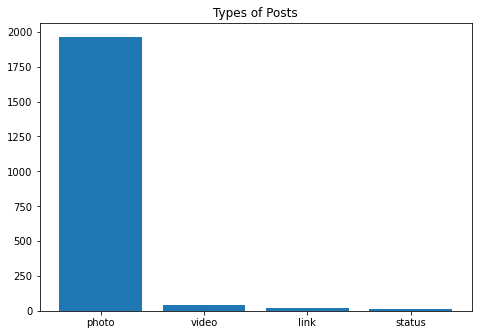

In [123]:
#representing the amount of entries with each type
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['photo', 'video', 'link', 'status']
students = [df["type"].value_counts()  [0],df["type"].value_counts()  [1], df["type"].value_counts()  [2], df["type"].value_counts()  [3]]
ax.bar(langs,students)
ax.set_title('Types of Posts')
plt.show()

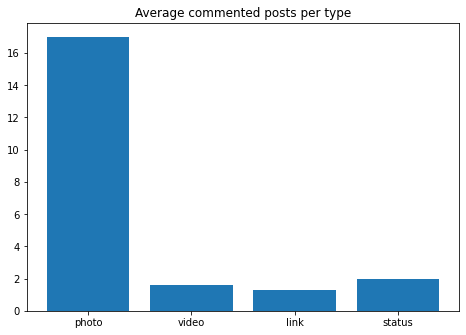

In [124]:
#representing the amount of entries with each type
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['photo', 'video', 'link', 'status']
students = [Commentnumbers [0] , Commentnumbers[1], Commentnumbers [2], Commentnumbers[3]]
ax.set_title('Average commented posts per type')
ax.bar(langs,students)
plt.show()

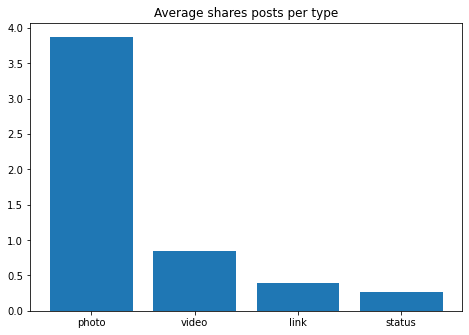

In [125]:
#representing the amount of entries with each type
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['photo', 'video', 'link', 'status']
students = [sharednumber [0] , sharednumber[1], sharednumber [2], sharednumber[3]]
ax.set_title('Average shares posts per type')
ax.bar(langs,students)
plt.show()

In [126]:
morning_comm=[0,13]
morning_share= [5,13]
afternoon_comm=[14,6]
afternoon_share=[13,6]
evening_comm= [6,1]
evening_share=[2,1]

Text(0.5, 0, 'TopComments              LeastComments')

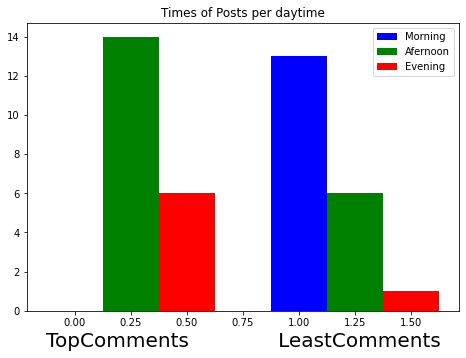

In [127]:
data = [[0,13],[14,6],[6,1]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Morning', 'Afernoon', 'Evening'])
ax.set_title('Times of Posts per daytime')
plt.xlabel('TopComments              LeastComments', fontsize = 20)

Text(0.5, 0, 'TopShared              LeastShared')

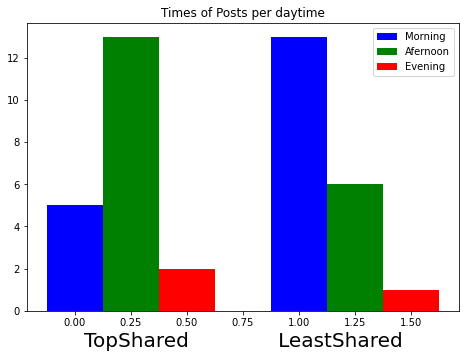

In [128]:
data = [[5,13],[13,6],[2,1]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Morning', 'Afernoon', 'Evening'])
ax.set_title('Times of Posts per daytime')
plt.xlabel('TopShared              LeastShared', fontsize = 20)

In [129]:
Topmorning=[0,5]
Topafternoon=[14,13]
Topevening=[6,2]

Text(0.5, 0, 'TopCommented              TopShared')

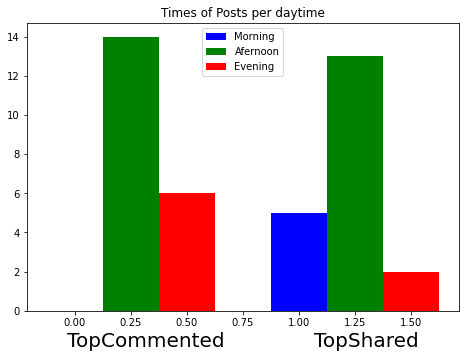

In [130]:
data = [[0,5],[14,13],[6,2]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['Morning', 'Afernoon', 'Evening'])
ax.set_title('Times of Posts per daytime')
plt.xlabel('TopCommented              TopShared', fontsize = 20)

### Sentiment Table

In [135]:
sentimentpol=[0.3077,0.28890000000000005,0.3474,0.33640000000000003]

In [136]:
sentimentsub=[0.4506,0.3919, 0.5237, 0.5687]

Text(0.5, 0, 'TopCommented TopShared      LeastCommented LeastShared')

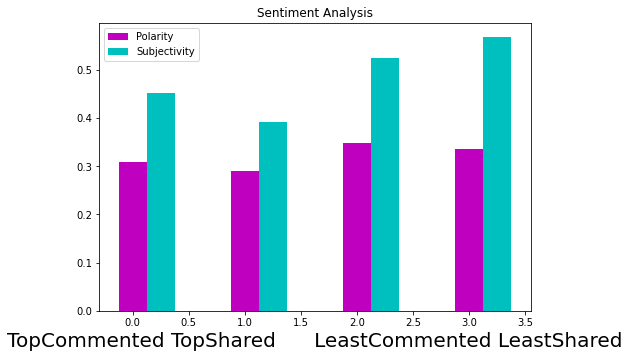

In [137]:
data = [[0.3077,0.28890000000000005,0.3474,0.33640000000000003] ,[0.4506,0.3919, 0.5237, 0.5687]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'c', width = 0.25)
ax.legend(labels=['Polarity', 'Subjectivity'])
ax.set_title('Sentiment Analysis')
plt.xlabel('TopCommented TopShared      LeastCommented LeastShared', fontsize = 20)